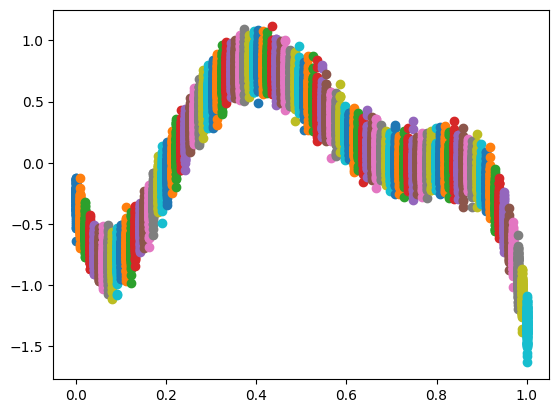

CUDA Available: False


In [1]:
from data_utils import generate_data_from_function
from experiment_utils import get_legendre_polynomial, generate_legendre_basis_expansion, multiply_functions
import numpy as np
import matplotlib.pyplot as plt
import torch

f, coeffs = generate_legendre_basis_expansion()
L_i = get_legendre_polynomial(2)
T, X = generate_data_from_function(multiply_functions(f, L_i), num_samples=500, sparsity=0.3)
time_values = np.linspace(0, 1, T.shape[1])

plt.plot(T, X, "o")
plt.show()

print(f"CUDA Available: {torch.cuda.is_available()}")  # Should return True

In [6]:
from neuralint import NeuralInt
from data_utils import get_dataloaders
from model_utils import load_model, train

dataloaders = get_dataloaders(T, X)
model = NeuralInt(input_dim=X.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4, weight_decay=1e-8)
epoch, loss = load_model(model, optimizer=optimizer)
train(model, optimizer, dataloaders["train"], dataloaders["validate"], num_epochs=500, starting_epoch = epoch, best_val_loss = loss)

Starting training at epoch 33/500, Validation Loss: 0.0040416
Epoch 33/500, Training Loss: 0.0083679
Epoch 33/500, Validation Loss: 0.0048405
Epoch 34/500, Training Loss: 0.0082729
Epoch 34/500, Validation Loss: 0.0047177
Epoch 35/500, Training Loss: 0.0082527
Epoch 35/500, Validation Loss: 0.0043713
Epoch 36/500, Training Loss: 0.0079862
Epoch 36/500, Validation Loss: 0.0049094
Epoch 37/500, Training Loss: 0.0146822
Epoch 37/500, Validation Loss: 0.0068465
Epoch 38/500, Training Loss: 0.0109136
Epoch 38/500, Validation Loss: 0.0051412
Epoch 39/500, Training Loss: 0.0087163
Epoch 39/500, Validation Loss: 0.0052736
Epoch 40/500, Training Loss: 0.0081350
Epoch 40/500, Validation Loss: 0.0052467
Epoch 41/500, Training Loss: 0.0079563
Checkpoint saved: checkpoints\checkpoint_epoch_41.pth
Epoch 41/500, Validation Loss: 0.0045058
Epoch 42/500, Training Loss: 0.0074841
Epoch 42/500, Validation Loss: 0.0041522
Epoch 43/500, Training Loss: 0.0072214
Epoch 43/500, Validation Loss: 0.0041086
Epoc

KeyboardInterrupt: 

In [3]:
from neuralint import get_imputation_from_checkpoint
import matplotlib.pyplot as plt

subset = dataloaders["test"].dataset
T_test, X_test, _ = subset.dataset[subset.indices]

X_imputed_transformer, X_imputed_neuralint, integration_fn = get_imputation_from_checkpoint(T_test, X_test)

c:\Users\Sri Pranav Kunda\Documents\Projects\NeuralInt\.venv\Lib\site-packages\torch\nn\modules\transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Loaded model checkpoint with epoch: 32, and validation loss: 0.004041608422994614


In [4]:
X_imputed_mean_neuralint = torch.mean(X_imputed_neuralint, axis=0).detach().numpy()
X_imputed_mean_transformer = torch.mean(X_imputed_transformer, axis=0).detach().numpy()

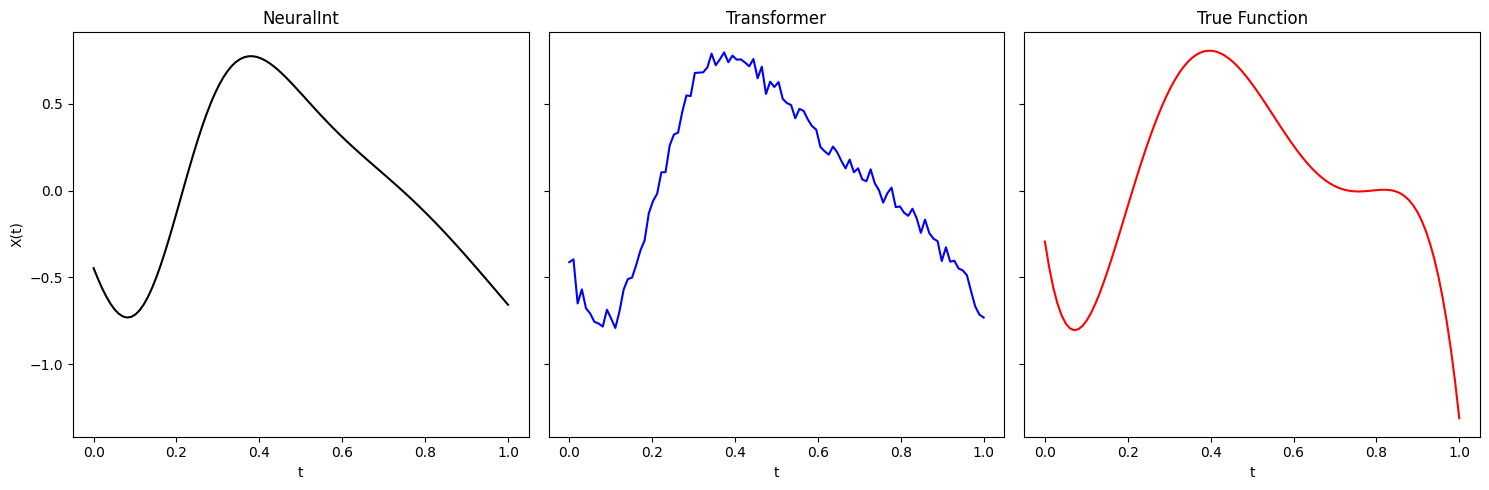

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

# Plot NeuralInt
axes[0].plot(time_values, X_imputed_mean_neuralint, color="black", label="NeuralInt")
axes[0].set_title("NeuralInt")
axes[0].set_xlabel('t')
axes[0].set_ylabel('X(t)')

# Plot Transformer
axes[1].plot(time_values, X_imputed_mean_transformer, color="blue", label="Transformer")
axes[1].set_title("Transformer")
axes[1].set_xlabel('t')

# Plot Actual Function
axes[2].plot(time_values, multiply_functions(f, L_i)(time_values), color="red", label="Actual Function")
axes[2].set_title("True Function")
axes[2].set_xlabel('t')

# Adjust layout
plt.tight_layout()
plt.show()

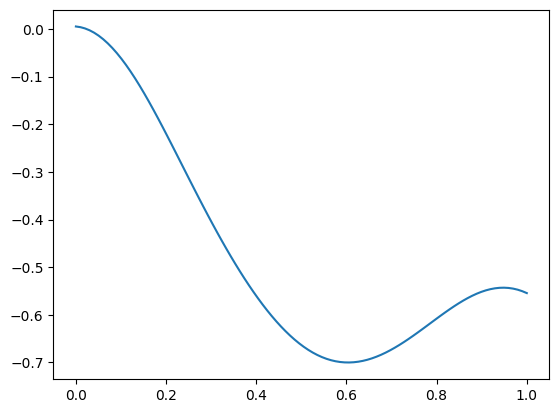

tensor(0.5312, grad_fn=<SubBackward0>)

In [ ]:
mean_integration_function = torch.mean(integration_fn, axis=0)
plt.plot(time_values, mean_integration_function.detach().numpy())
plt.show()